**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Juan Manuel Carballo Montaño
*   MATRÍCULA: A01166758

---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [90]:
import pandas as pd

In [91]:
# Creacion del dataframe por medio de la funcion read_csv
air_df = pd.read_csv("../datasets/LaqnData.csv")

In [92]:
# Shape del dataframe
air_df.shape

(43800, 6)

In [93]:
# Columnas del dataframe
air_df.columns

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [94]:
# Primeras 5 columnas del dataframe
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [95]:
# Últimas 5 columnas del dataframe
air_df.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [96]:
# Tipo de dato para cada columna del dataframe
air_df.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

In [97]:
# declara una variable de tipo dict
percentage_by_col = {}
# Iteramos sobre las columnas de dataframe
for column in air_df.columns:
    # Calculamos el porcentaje de valores faltantes por cada columna usando la siguiente formula
    # ((total valores - valores no nulos) / total valores) * 100
    # el valor resultante lo concatenamos en un string con precision de 2 digitos
    percentage_by_col[column] = "%0.2f%s"%((((air_df.shape[0] - air_df[column][air_df[column].notnull()].count()) / (air_df.shape[0])) * 100), "%")

# imprimimos los valores de la variable tipo dict
percentage_by_col

{'Site': '0.00%',
 'Species': '0.00%',
 'ReadingDateTime': '0.00%',
 'Value': '7.37%',
 'Units': '0.00%',
 'Provisional or Ratified': '0.00%'}

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

Respuestas

* Se ejecutaron 8760 eventos de medicion
* Se analizaron 5 diferentes contaminantes del aire
* Las columnas que no agregan ningún valor son 'Site' y 'Provisional or Ratified'

In [98]:
air_df.nunique()

Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

In [99]:
if 'Site' in air_df.columns:
    del air_df['Site']

if 'Provisional or Ratified' in air_df.columns:
    del air_df['Provisional or Ratified']

if 'Units' in air_df.columns:
    del air_df['Units']

air_df.columns

Index(['Species', 'ReadingDateTime', 'Value'], dtype='object')

3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

Respuestas

* Por cada elemento contaminante se ejecutaron 8760 observaciones y son 5 contaminantes diferentes entonces coincide con el total de mediciones

In [100]:
air_df.value_counts(['Species'])

Species
NO         8760
NO2        8760
NOX        8760
PM10       8760
PM2.5      8760
dtype: int64

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

Respuestas

Para cada contaminante encontramos los siguiente resultados:

Óxido Nítrico el promedio es de 15.04µg/m3 y una desviación estándar de 26.67µg/m3
Dióxido de Nitrógeno el promedio es de 38.01µg/m3
Óxidos Nitrosos el promedio es de 61.07µg/m3
Partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros el promedio es de 22.55µg/m3
Partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros el promedio es de 14.99µg/m3

In [101]:
air_df.groupby(by = 'Species').mean()

C:\Users\jmcar\AppData\Local\Temp\ipykernel_8484\139975995.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  air_df.groupby(by = 'Species').mean()


,Value
Species,
NO,15.045115
NO2,38.010185
NOX,61.078661
PM10,22.551704
PM2.5,14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [102]:
pvt_df = pd.pivot(air_df, index='ReadingDateTime', columns='Species', values='Value')

pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

Respuestas

* El valor mas grande registrado de NO2 es de 120.2µg/m3 y corresponde al 24 de enero del 2017
* El valor mas pequeño registradod de PM10 es de -5.6µg/m3 y corresponde al 12 de septiembre del 2017
* La mediana de NO es de 7.1µg/m3 y se interpreta como el valor que esta a exactamente a la mitad de los valores ordenados de la frequencia del rango de mediciones que se hicieron
* El primer cuartil del PM2.5 es de 7.0µg/m3 y el valor indica que el valor esta exactamente en el 25% de los valores ordenados de la frecuencia del rango de mediciones que se hicieron

In [103]:
pvt_df.describe()

Species,NO,NO2,NOX,PM10,PM2.5
count,8660.000000,8660.000000,8660.000000,8657.000000,5933.000000
mean,15.045115,38.010185,61.078661,22.551704,14.999831
std,26.678565,18.580841,54.584805,15.344755,13.558588
min,-2.000000,2.800000,1.000000,-5.600000,-8.000000
25%,3.100000,23.800000,30.300000,13.900000,7.000000
50%,7.100000,35.300000,46.900000,19.500000,11.000000
75%,15.500000,49.900000,73.800000,27.300000,18.000000
max,401.799990,120.200000,734.299990,633.099980,128.000000


7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

Respuestas

El contaminante NO2 (dióxido de nitrogeno) es el que presenta mayor variabilidad

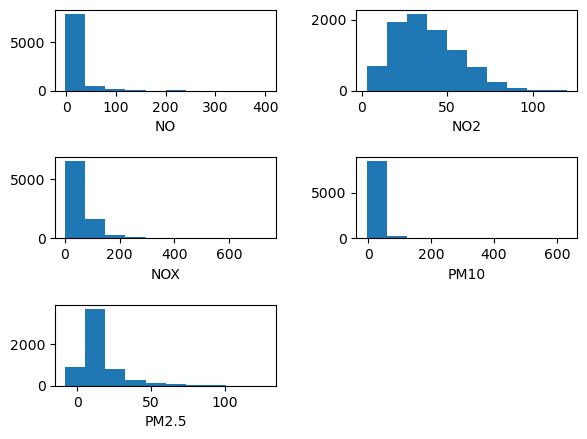

In [104]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,2)

fig.tight_layout(pad=2.7)
fig.delaxes(ax=ax[2,1])
for name, i, j in zip(pvt_df.columns, [0, 1, 0, 1, 0], [0, 0, 1, 1, 2]):
    ax[j,i].hist(pvt_df[name])
    ax[j,i].set_xlabel(name)

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [105]:
# Dataframe ´air_df´ hacemos referencia a la columna ReadingDateTime, hacemos un cast a ´string´ y colocamos en columnas diferentes el resultado 
# de divir la cadena por el caracter espacio vacio y retornamos en un nuevo dataframe ´datetime_df´
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
# A las nuevas columnas creadas le asignamos la etiquetas ´Date´ y ´Time´ respectivamente
datetime_df.columns = ['Date','Time']
# Cuando es última linea de la celda, imprime el contenido de variable
datetime_df
# Dataframe ´datetime_df´ hacemos referencia a la columna ´Date´, hacemos un cast a ´string´ y colocamos en columnas diferentes el resultado
# de dividir la cadena por el caracter slash o diagonal y retornamos en nuevo dataframe ´date_df´
date_df = datetime_df.Date.str.split('/',expand=True)
# A las nuevas columnas creadas le asignamos las etiquetas ´Day´, ´Month´ y ´Year´
date_df.columns = ['Day','Month','Year']
# Cuando es última linea de la celda, imprime el contenido de variable
date_df
# Dataframe ´air_df´ hacemos un join al dataframe ´date_df´ y un join al dataframe ´datetime_df´ a la Series ´Time´ y eliminamos
# la columna ´ReadingDateTime´ y ´Year´
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
# creamos un indice sobre las columnas ´Month´, ´Day´, ´Time´ y ´Species´
air_df = air_df.set_index(['Month','Day','Time','Species'])
# Imprime el contenido de la variable ´air_df´
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara la salida del código anterior con `pvt_df` del ejercicio 8. ¿Son iguales?

Respuesta

* Estrictamente hablando no son iguales puesto que la funcion unstack, toma una etiqueta de la jerarquía de índices y la pivotea en columnas
* Opuesto al ejercicio 8 que no pivotea y solo muestra la columna Value y como indices Month, Day, Time y Species

In [106]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Respuesta

* Las funciones melt y pivot son opuestas mientras que pivot crea un dataframe en wide-format, la funcion melt retorna ese dataframe a long-format
* Las funciones stack y unstack de igual forma son opuestas mientras que stack crea un dataframe en wide-format, la funcion unstack retorna ese dataframe a long-format
* La diferencia principal entre ambos conjuntos de funciones es que melt y pivot reciben parámetros para ajustar el dataframe en wide-format, las funciones stack y unstack no reciben parámetros sin embargo toman un valor del índice (el último en la Jerárquia) del dataframe para pivotear el dataframe